In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("Diwali.csv", encoding="ISO-8859-1")

In [10]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [13]:
df.shape

(11251, 15)

In [14]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [15]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=['Status', 'unnamed1'])

In [16]:
# Remove rows with missing values in 'Amount' column
df_cleaned = df_cleaned.dropna(subset=['Amount'])

In [17]:
# Confirm dataset cleanup
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB
None


Basic Data Exploration


In [18]:
# Check the number of unique customers
print("Total Unique Customers:", df_cleaned["User_ID"].nunique())


Total Unique Customers: 3752


In [19]:
# Check the number of unique products sold
print("Total Unique Products Sold:", df_cleaned["Product_ID"].nunique())

Total Unique Products Sold: 2350


In [20]:
# Total Revenue generated
print("Total Revenue from Sales:", df_cleaned["Amount"].sum())

Total Revenue from Sales: 106249132.43


In [21]:
# Summary statistics of numerical columns
print(df_cleaned.describe())

            User_ID           Age  Marital_Status        Orders        Amount
count  1.123900e+04  11239.000000    11239.000000  11239.000000  11239.000000
mean   1.003004e+06     35.410357        0.420055      2.489634   9453.610858
std    1.716039e+03     12.753866        0.493589      1.114967   5222.355869
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000
25%    1.001492e+06     27.000000        0.000000      2.000000   5443.000000
50%    1.003064e+06     33.000000        0.000000      2.000000   8109.000000
75%    1.004426e+06     43.000000        1.000000      3.000000  12675.000000
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000


 Exploratory Data Analysis (EDA)
 (a) Gender and Age Group Distribution

In [22]:
# Set style for plots
sns.set_style("whitegrid")

<ipython-input-23-58e98756f0f7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df_cleaned, palette="coolwarm")


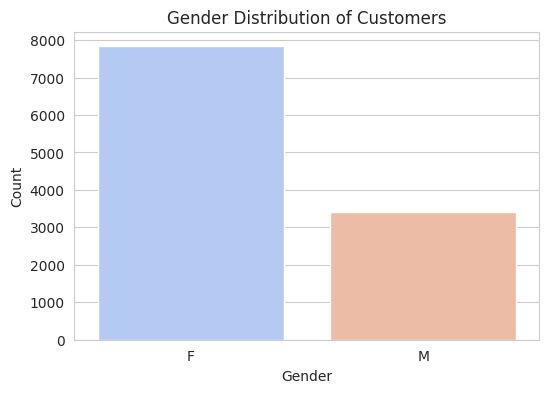

In [23]:
# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df_cleaned, palette="coolwarm")
plt.title("Gender Distribution of Customers")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

<ipython-input-24-8ce81ea5d1ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Age Group", data=df_cleaned, palette="viridis", order=df_cleaned["Age Group"].value_counts().index)


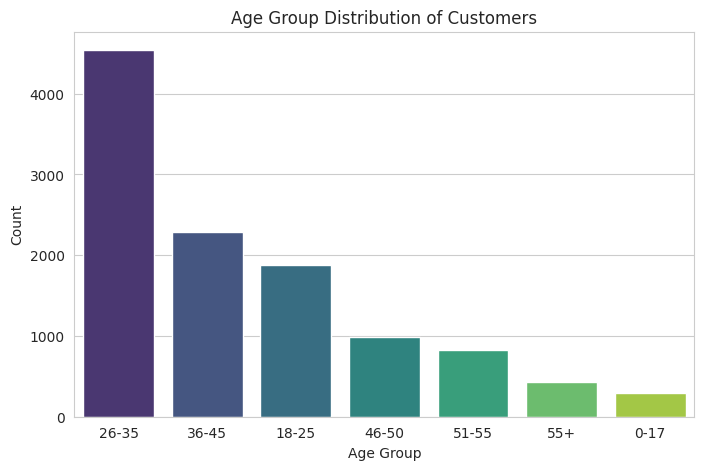

In [24]:
# Age Group Distribution
plt.figure(figsize=(8,5))
sns.countplot(x="Age Group", data=df_cleaned, palette="viridis", order=df_cleaned["Age Group"].value_counts().index)
plt.title("Age Group Distribution of Customers")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

(b) Marital Status Analysis

<ipython-input-25-2f1b461c9b5a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Marital_Status", data=df_cleaned, palette="pastel")


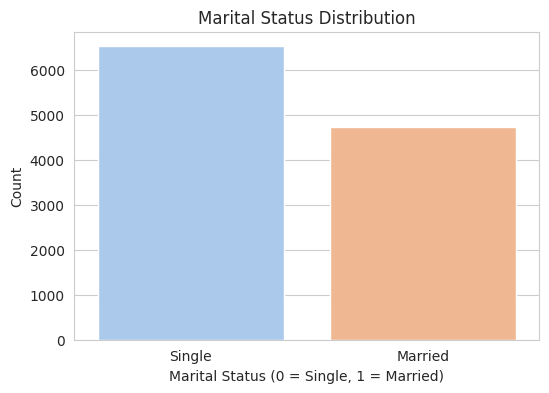

In [25]:
# Marital Status Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Marital_Status", data=df_cleaned, palette="pastel")
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status (0 = Single, 1 = Married)")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=["Single", "Married"])
plt.show()

(c) State-wise and Zone-wise Sales Analysis

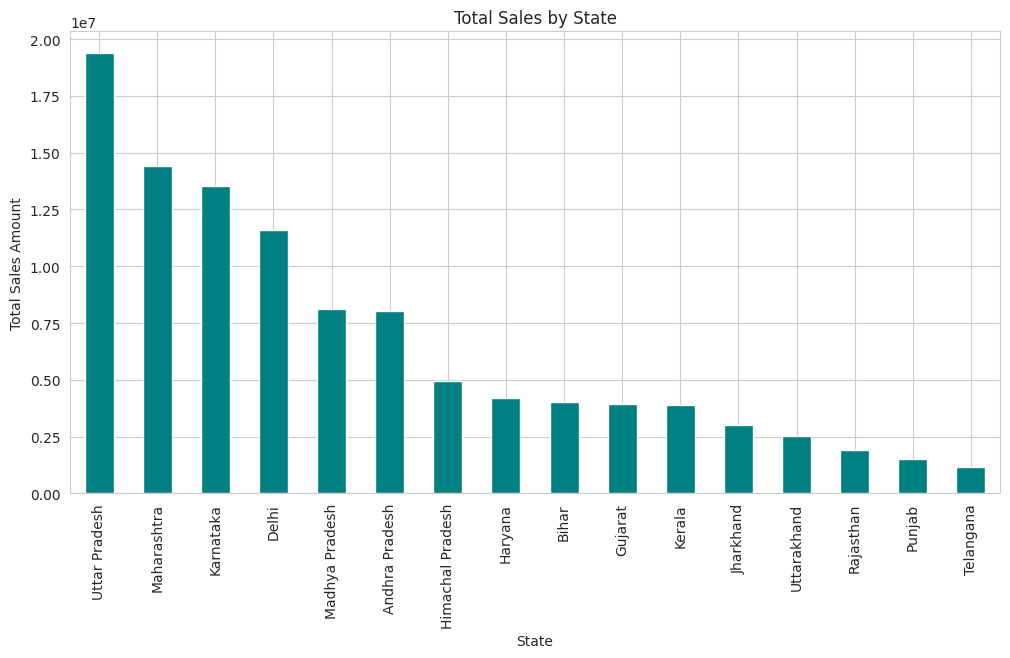

In [26]:
# Sales by State
plt.figure(figsize=(12,6))
state_sales = df_cleaned.groupby("State")["Amount"].sum().sort_values(ascending=False)
state_sales.plot(kind="bar", color="teal")
plt.title("Total Sales by State")
plt.xlabel("State")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=90)
plt.show()

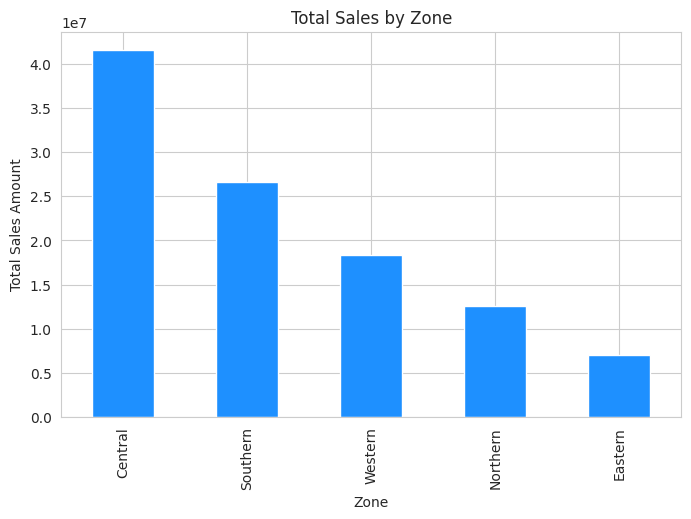

In [27]:
# Sales by Zone
plt.figure(figsize=(8,5))
zone_sales = df_cleaned.groupby("Zone")["Amount"].sum().sort_values(ascending=False)
zone_sales.plot(kind="bar", color="dodgerblue")
plt.title("Total Sales by Zone")
plt.xlabel("Zone")
plt.ylabel("Total Sales Amount")
plt.show()

(d) Occupation-wise Sales Analysis

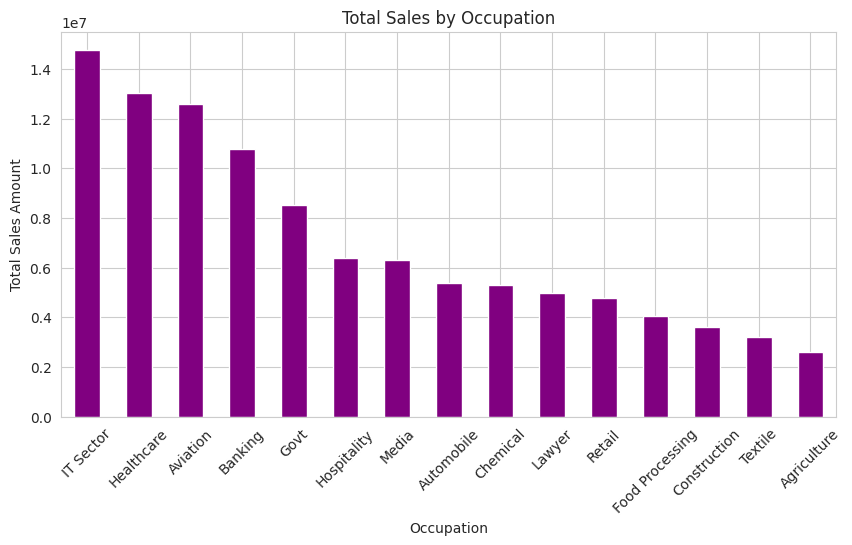

In [28]:
# Sales by Occupation
plt.figure(figsize=(10,5))
occupation_sales = df_cleaned.groupby("Occupation")["Amount"].sum().sort_values(ascending=False)
occupation_sales.plot(kind="bar", color="purple")
plt.title("Total Sales by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

4. Sales and Revenue Insights
(a) Total Sales Revenue

In [29]:
# Total Revenue Calculation
total_revenue = df_cleaned["Amount"].sum()
print("Total Revenue Generated: ₹", total_revenue)

Total Revenue Generated: ₹ 106249132.43


(b) Product Category-wise Sales

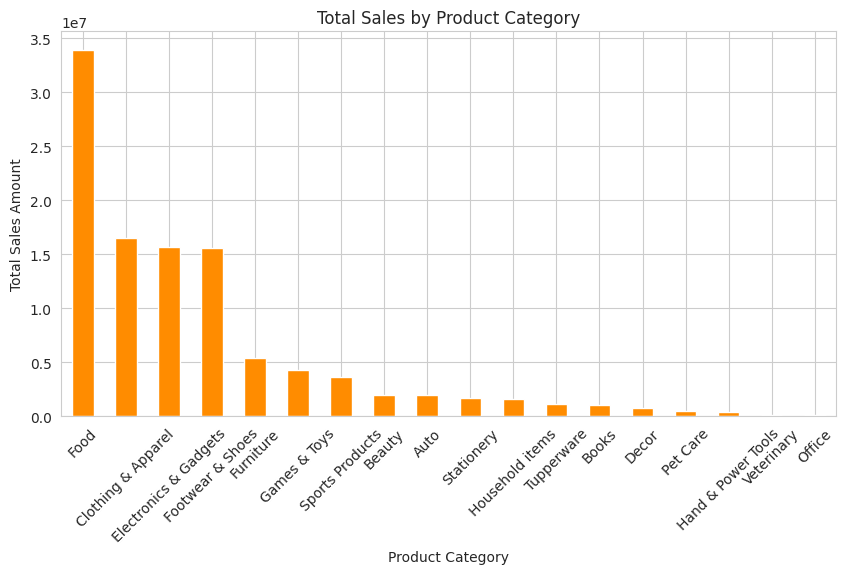

In [30]:
# Sales by Product Category
plt.figure(figsize=(10,5))
category_sales = df_cleaned.groupby("Product_Category")["Amount"].sum().sort_values(ascending=False)
category_sales.plot(kind="bar", color="darkorange")
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

(c) Top 10 Customers by Total Purchase
python
Copy code


In [31]:
# Top 10 Customers by Purchase Amount
top_customers = df_cleaned.groupby("Cust_name")["Amount"].sum().sort_values(ascending=False).head(10)

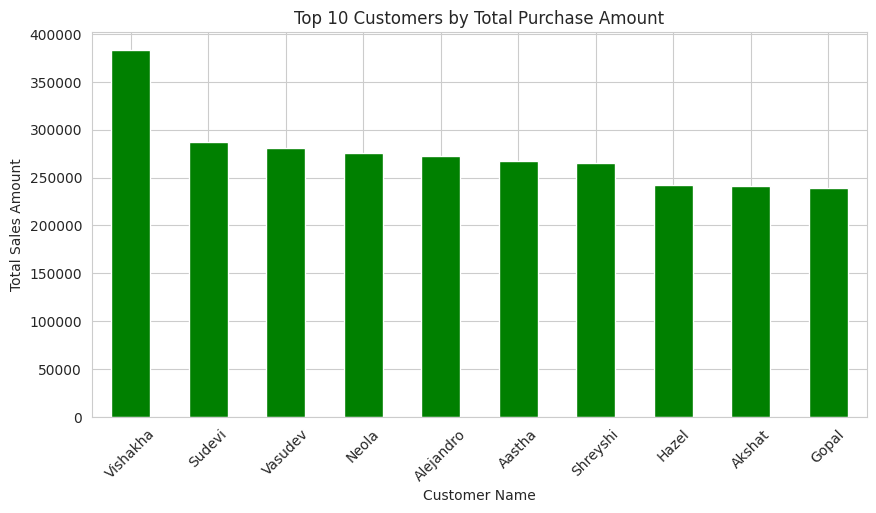

In [32]:
# Plot top customers
plt.figure(figsize=(10,5))
top_customers.plot(kind="bar", color="green")
plt.title("Top 10 Customers by Total Purchase Amount")
plt.xlabel("Customer Name")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

5. Purchase Behavior Analysis
(a) Orders vs. Amount Correlation

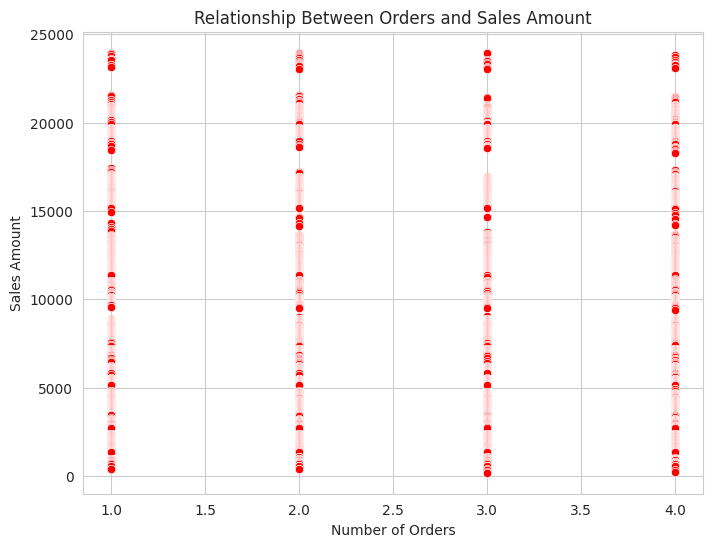

In [33]:
# Scatter Plot for Orders vs Amount
plt.figure(figsize=(8,6))
sns.scatterplot(x="Orders", y="Amount", data=df_cleaned, color="red")
plt.title("Relationship Between Orders and Sales Amount")
plt.xlabel("Number of Orders")
plt.ylabel("Sales Amount")
plt.show()

(b) Most Purchased Product Categories

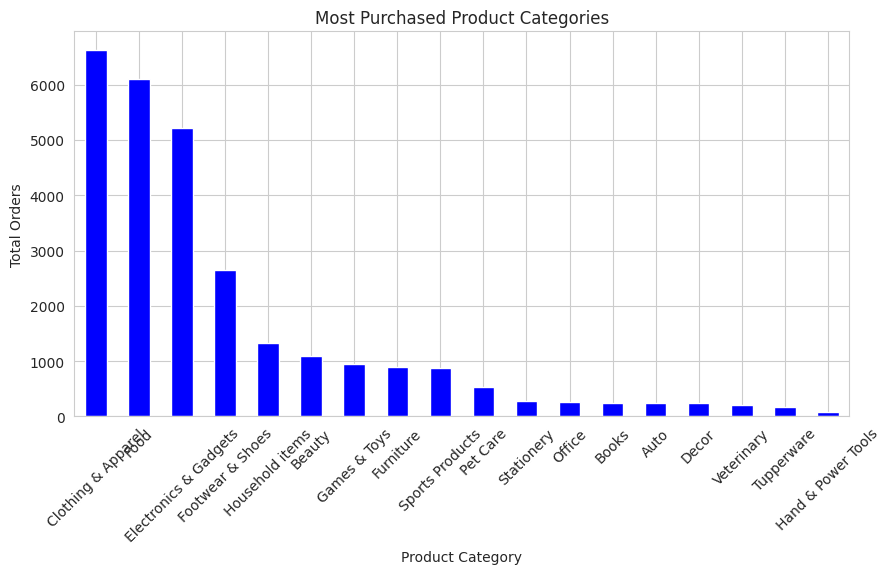

In [34]:
# Count of Orders per Product Category
plt.figure(figsize=(10,5))
product_orders = df_cleaned.groupby("Product_Category")["Orders"].sum().sort_values(ascending=False)
product_orders.plot(kind="bar", color="blue")
plt.title("Most Purchased Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.show()

6. Conclusion and Key Insights

In [37]:
print(''' Final Conclusion of the Diwali Sales Analysis

1. Customer Demographics:
- Most customers are female, indicating that women are the primary shoppers during Diwali sales.
- The 26-35 age group dominates sales, followed by the 18-25 age group, meaning young to middle-aged adults are the key buyers.
- Married individuals tend to spend more than single individuals.

2. Sales Insights:
- State-wise sales analysis shows that some states contribute significantly higher revenue, while others have lower sales, possibly due to low marketing reach.
- Zone-wise analysis reveals which regions are more active in shopping during Diwali.
- Occupation-based analysis indicates that certain professions contribute more to overall spending.

3. Customer Spending Behavior:
- The top 10 customers have significantly higher purchase amounts, showing that some customers are high-value buyers.
- There is a strong correlation between the number of orders and sales revenue, meaning frequent buyers are crucial to overall business sales.

4. Product Performance:
- Some product categories perform much better, showing high demand for specific products.
- Other categories have lower sales, suggesting that they may require better promotions or discounts.

5. Business Recommendations:
- Marketing Strategy: Focus advertising on the female demographic and the 26-35 age group since they form the majority of buyers.
- Product Strategy: Ensure high-demand products are well-stocked and promoted.
- Regional Focus: Increase promotions in states where sales are low to improve revenue.
- Customer Retention: Implement loyalty programs, discounts, and personalized offers for high-value customers.

This analysis provides actionable insights into Diwali sales trends, helping businesses optimize marketing, inventory, and customer engagement strategies for future growth.''')


 Final Conclusion of the Diwali Sales Analysis

1. Customer Demographics:  
- Most customers are female, indicating that women are the primary shoppers during Diwali sales.  
- The 26-35 age group dominates sales, followed by the 18-25 age group, meaning young to middle-aged adults are the key buyers.  
- Married individuals tend to spend more than single individuals.  

2. Sales Insights:  
- State-wise sales analysis shows that some states contribute significantly higher revenue, while others have lower sales, possibly due to low marketing reach.  
- Zone-wise analysis reveals which regions are more active in shopping during Diwali.  
- Occupation-based analysis indicates that certain professions contribute more to overall spending.  

3. Customer Spending Behavior:  
- The top 10 customers have significantly higher purchase amounts, showing that some customers are high-value buyers.  
- There is a strong correlation between the number of orders and sales revenue, meaning frequent bu